<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°072


## I.- Problema 01


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>


El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [4]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [12]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.tail()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9
1796,0,0,10,14,8,1,0,0,0,2,...,0,0,1,8,12,14,12,1,0,8


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [14]:
print(digits.shape)
print(digits.info())
print(digits.describe())

(1797, 65)
          c00          c01          c02          c03          c04  \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

               c05          c06          c07          c08          c09  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.

Tenemos 1797 imagenes que representan un digito y 64 columnas, las primeras 63 indican la representacion de la imagen en escala de blanco-grises y la ultima representa el digito que se intenta escribir. Los digitos que representan los pixeles estan en formato int asi como el digito target. No hay valores Null ni NaN lo cual indica una correcta lectura de datos.

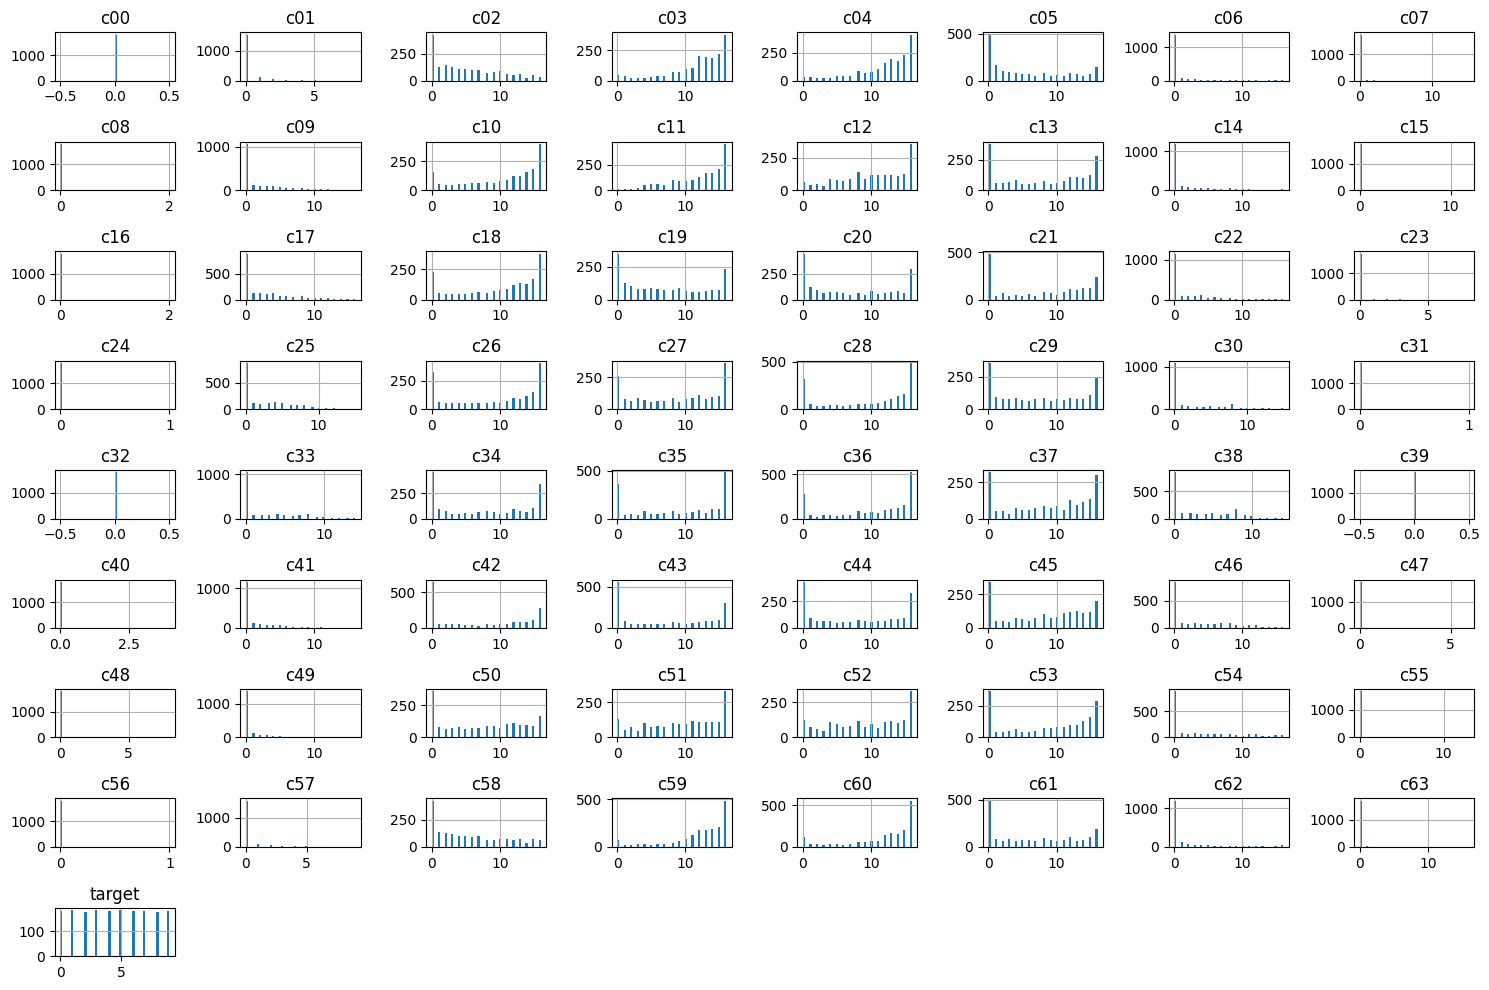

In [19]:
digits.hist(figsize=(15, 10),bins=50)
plt.tight_layout()
plt.show()

Podemos notar presencia de outliers lo que hace que la media no sea representitva y los modelos podrian fallar en predecir a las clases con outliers

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [15]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

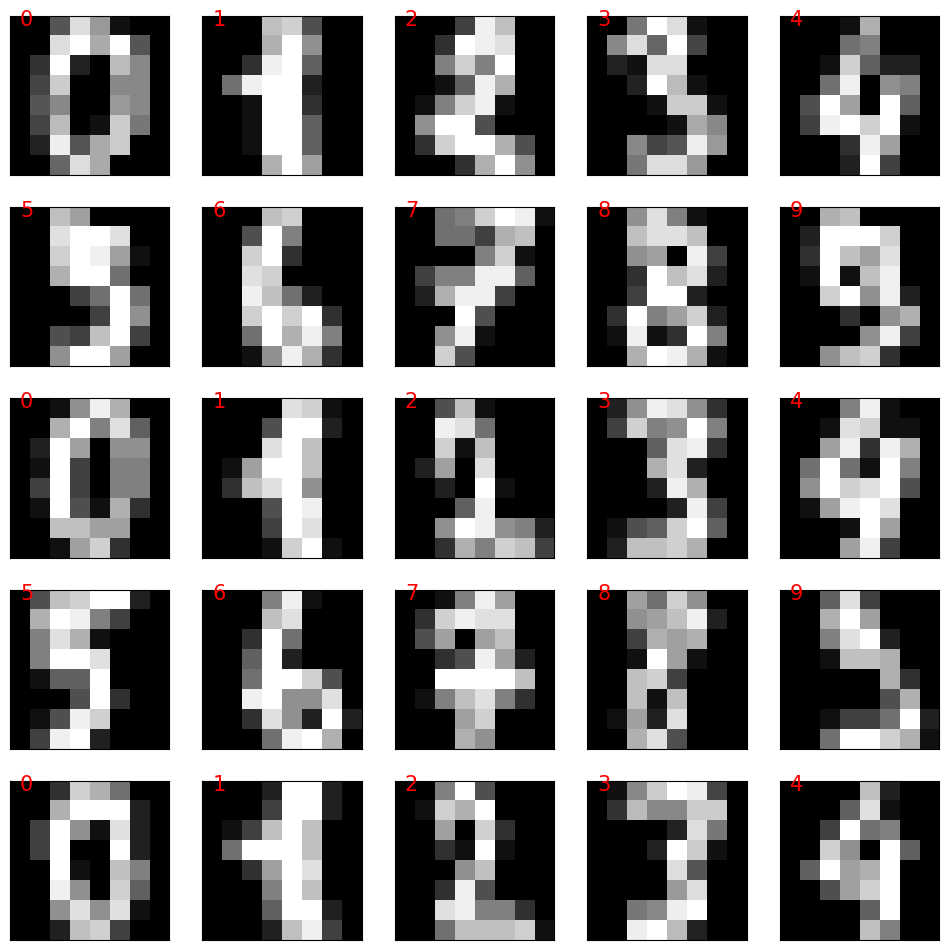

In [22]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
imagen=digits_dict['images'][:25]
nombre=digits_dict['target'][:25]
for i in range(nx):
    for j in range(ny):
        axs[i, j].imshow(imagen[i*ny+j], cmap='gray')
        axs[i, j].text(0, 0, nombre[i*ny+j], color='red', fontsize=15)
        axs[i, j].get_xaxis().set_visible(False)
        axs[i, j].get_yaxis().set_visible(False)
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [23]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

El tercer modelo a escoger es **SVM o Support Vector Machines** para compararlo directamente con K-Nearest Neighbors

In [49]:
#cargando modelos
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score


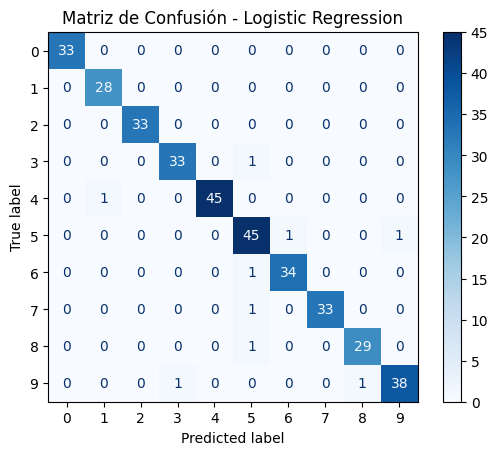

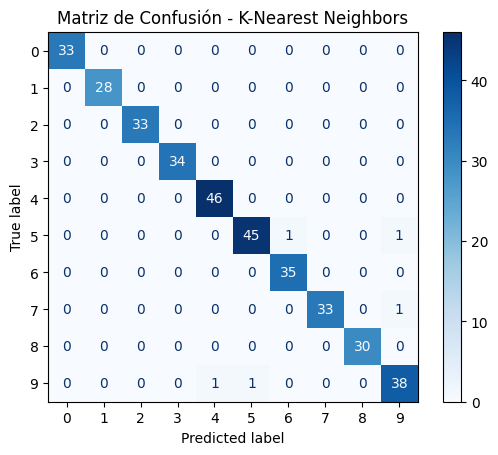

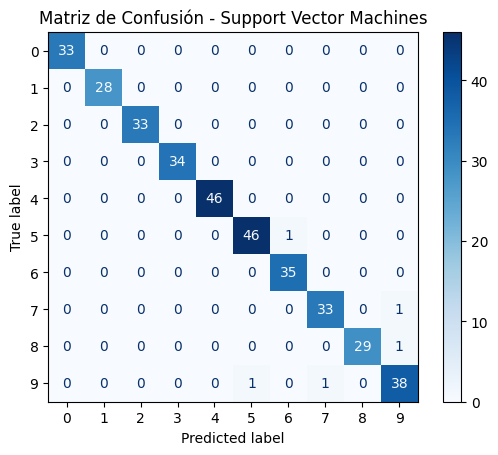

                    Modelo  Accuracy  Precision    Recall  F1-Score  \
0      Logistic Regression  0.975000   0.975478  0.975000  0.975109   
1      K-Nearest Neighbors  0.986111   0.986187  0.986111  0.986080   
2  Support Vector Machines  0.986111   0.986188  0.986111  0.986107   

   Tiempo de Ejecución  
0             0.722281  
1             0.092750  
2             0.127856  


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machines": SVC()
}
# Entrenar y evaluar los modelos
results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()

    # Calcular las métricas de error
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Guardar los resultados
    results.append([name, accuracy, precision, recall, f1, end_time - start_time])

    # Graficar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits_dict['target_names'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()
# Mostrar los resultados en una tabla
results_df = pd.DataFrame(results, columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Tiempo de Ejecución'])
print(results_df)



*   ¿Cuál modelo es mejor basado en sus métricas?

Basado en las metricas el mejor modelo por un margen muy pequeño es el SVD
*   ¿Cuál modelo demora menos tiempo en ajustarse?

El modelo que menor tiempo le demoro es el de K-Nearest Neighbors
*   ¿Qué modelo escoges?

Escogere el modelo SVD, si bien, se demora un poco mas, esta no es mucha la diferencia y prefiero algo aunque sea un poco mas preciso.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

<ipython-input-57-5fc2b42aeddf>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color=plt.cm.get_cmap('tab10')(i),
<ipython-input-57-5fc2b42aeddf>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color=plt.cm.get_cmap('tab10')(i),
<ipython-input-57-5fc2b42aeddf>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color=plt.cm.get_cmap('tab10')(i),
<ipython-input-57-5fc2b42aeddf>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will 

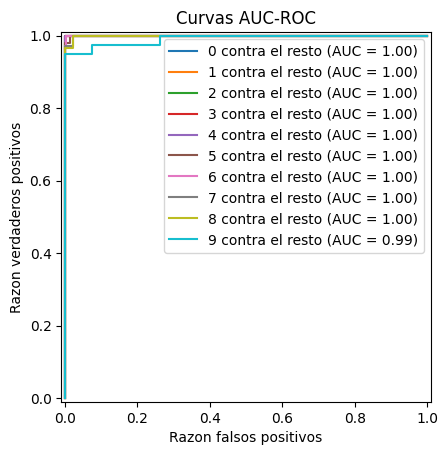

In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
svc_model=SVC()
svc_model.fit(X_train, y_train)
for i in range(10):
    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    class_id
    y_score = svc_model.decision_function(X_test)
    from sklearn.metrics import RocCurveDisplay

    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} contra el resto",
        color=plt.cm.get_cmap('tab10')(i),
        plot_chance_level=False,
        ax=plt.gca()
    )
plt.xlabel("Razon falsos positivos")
plt.ylabel("Razon verdaderos positivos")
plt.title("Curvas AUC-ROC")
plt.legend(loc="best")
plt.show()

Del grafico es claro que el modelo ha predicho con exito los digitos dado pixeles, pues todos tienen una razon de falsos positivos casi nula.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [62]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Valores incorrectos: SVC


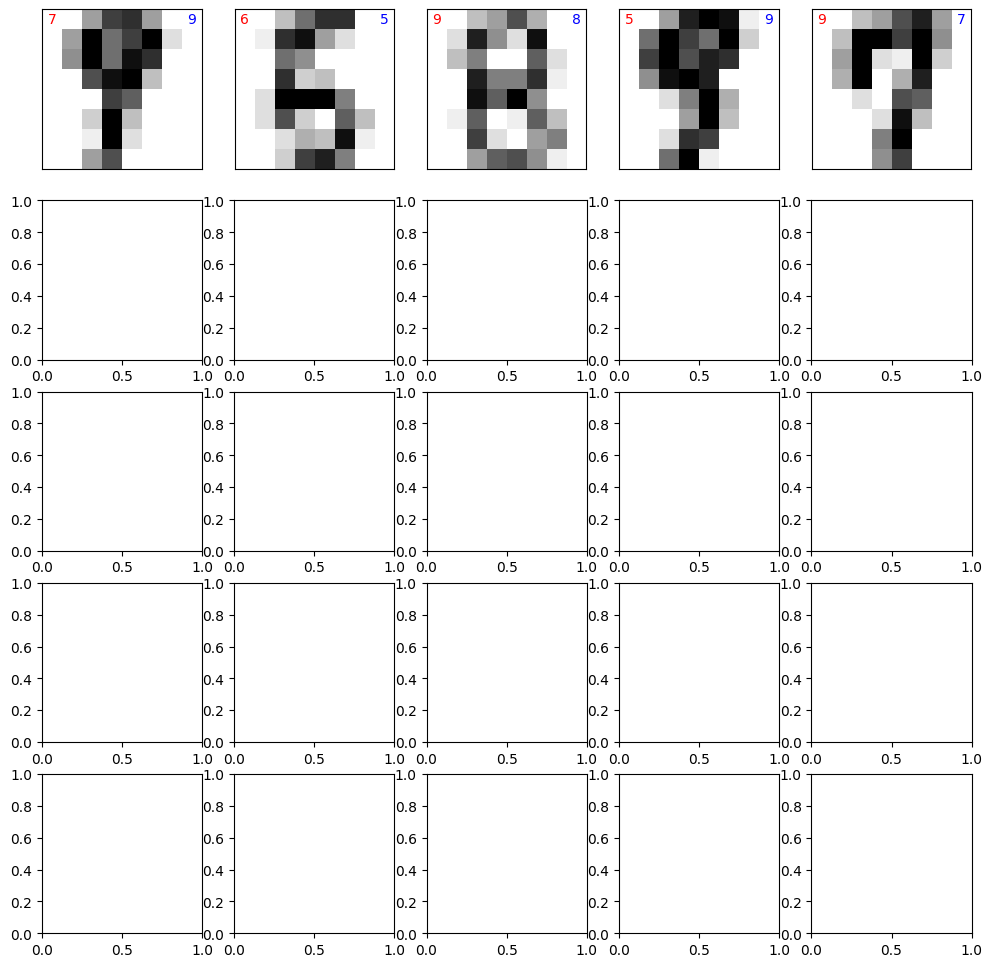

Valores incorrectos: K-Nearest Neighbors


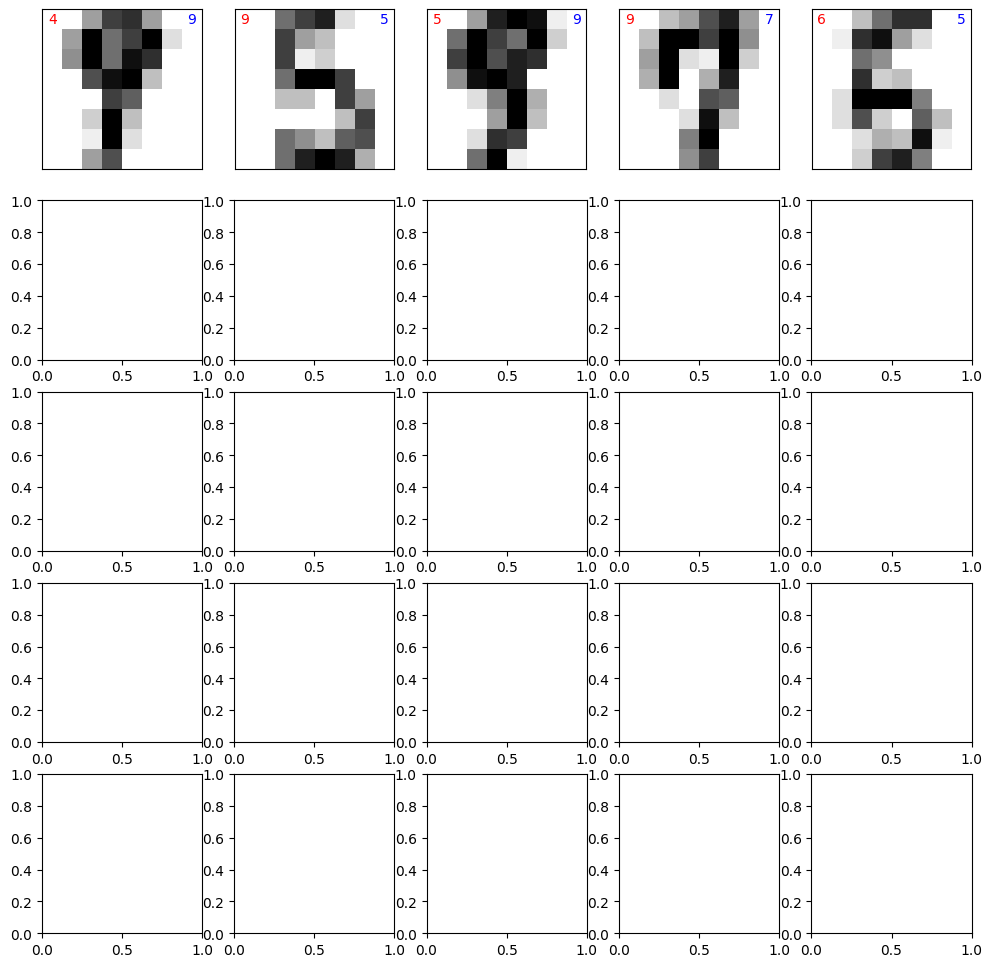

Valores incorrectos: Logistic Regression


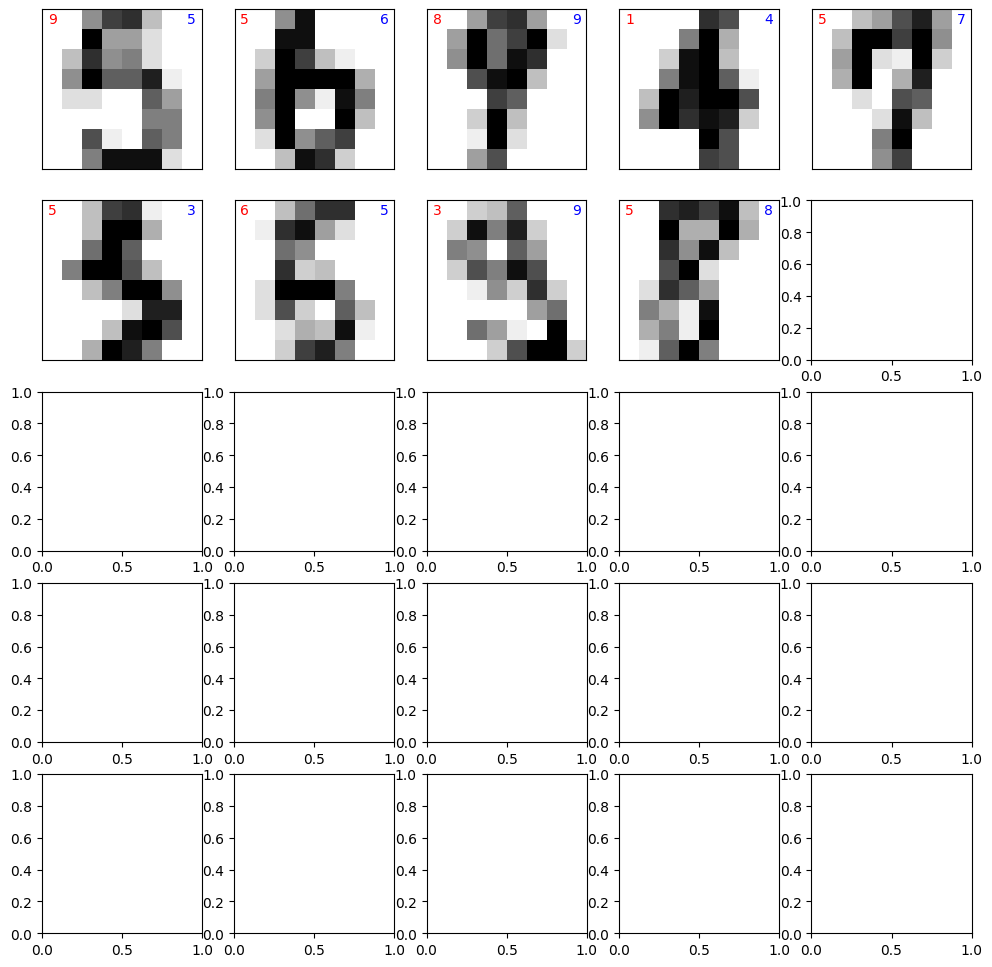

In [69]:
print("Valores incorrectos: SVC")
mostrar_resultados(digits, SVC(), nx, ny, 'incorrectos')
print('Valores incorrectos: K-Nearest Neighbors')
mostrar_resultados(digits, KNeighborsClassifier(), nx, ny, 'incorrectos')
print('Valores incorrectos: Logistic Regression')
mostrar_resultados(digits, LogisticRegression(max_iter=1000), nx, ny, 'incorrectos')

Los errores parecen ocurrir donde la densidad de pixeles hace ambigua el reconocer el numero. Esto puede deberse a que hemos quitado resolucion a las imagenes.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Sin duda alguna la dificultad radica en escoger bien el modelo o idear uno nuevo. Pues, esto se puede dificultar rapidamente si en vez de analizar un numero se tiene que analizar una secuencia larga de ellos.
Pese a todo esto, el modelo escogido ha funcionado bien y de 25 imagenes solo fallo en 5